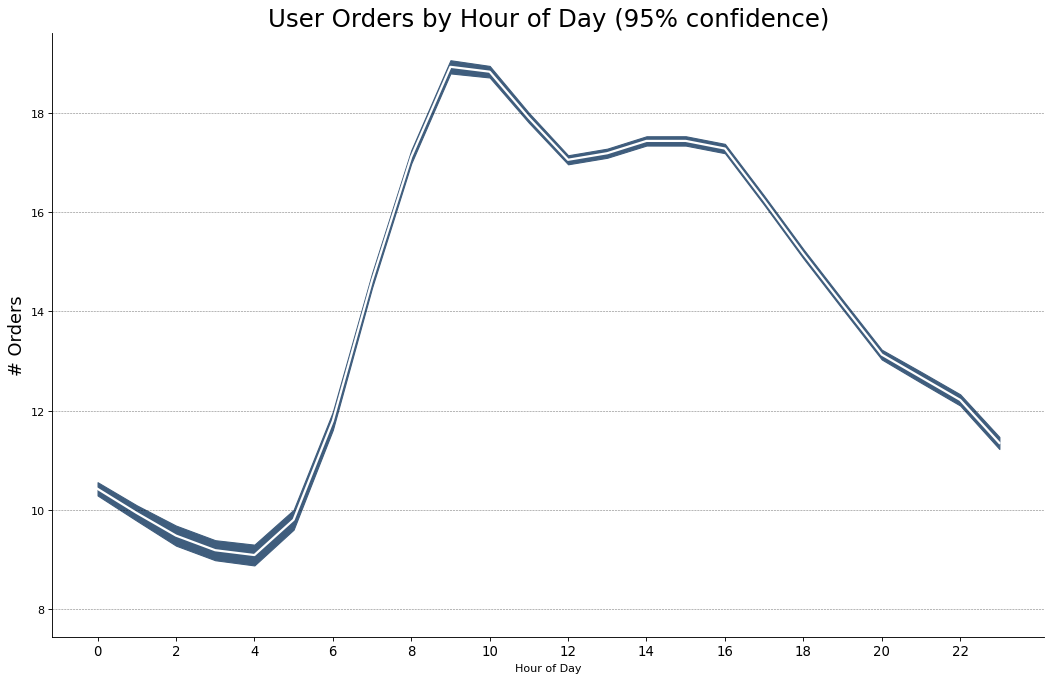

In [1]:
from scipy.stats import sem
import pandas as pd
import matplotlib.pyplot as plt

# Import Data
df = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/user_orders_hourofday.csv")
df_mean = df.groupby('order_hour_of_day').quantity.mean()
df_se = df.groupby('order_hour_of_day').quantity.apply(sem).mul(1.96)

# Plot
plt.figure(figsize=(16,10), dpi= 80)
plt.ylabel("# Orders", fontsize=16)  
x = df_mean.index
plt.plot(x, df_mean, color="white", lw=2) 
plt.fill_between(x, df_mean - df_se, df_mean + df_se, color="#3F5D7D")  

# Decorations
# Lighten borders
plt.gca().spines["top"].set_alpha(0)
plt.gca().spines["bottom"].set_alpha(1)
plt.gca().spines["right"].set_alpha(0)
plt.gca().spines["left"].set_alpha(1)
plt.xticks(x[::2], [str(d) for d in x[::2]] , fontsize=12)
plt.title("User Orders by Hour of Day (95% confidence)", fontsize=22)
plt.xlabel("Hour of Day")

s, e = plt.gca().get_xlim()
plt.xlim(s, e)

# Draw Horizontal Tick lines  
for y in range(8, 20, 2):    
    plt.hlines(y, xmin=s, xmax=e, colors='black', alpha=0.5, linestyles="--", lw=0.5)

plt.show()